# Challenge: Rick and Morty API

![](http://as01.epimg.net/epik/imagenes/2019/02/12/portada/1549970850_227267_1549973816_noticia_normal.jpg)


**In this challenge, you'll develop codes to parse and analyze data returned from the [Rick and Morty API](https://rickandmortyapi.com/).** The workflow is almost the same as in the guided lesson but you'll work with different data.

## Obtaining the link

Wrote your codes in the cell below to obtain the data from the API endpoint you choose. A recap of the workflow:

1. Examine the webpages and choose one that you want to work with.

1. Use Google Chrome's DevTools to inspect the XHR network requests. Find out the API endpoint that serves data to the webpage.

1. Test the API endpoint in the browser to verify its data.

1. Change the page number offset of the API URL to test if it's working.

In [1]:
# your code here

## Reading the data

In the next cell, use Python to obtain data from the API endpoint you chose in the previous step. Workflow:

1. Import libraries.

1. Define the initial API endpoint URL.

1. Make request to obtain data of the 1st page. Flatten the data and store it in an empty object variable.

1. Find out the total page count in the 1st page data.

1. Use a FOR loop to make requests for the additional pages from 2 to page count. Append the data of each additional page to the flatterned data object.

1. Print and review the data you obtained.

In [2]:
import requests as r

url = "https://rickandmortyapi.com/api/character/"

response = r.get(url)

In [3]:
results = response.json()
results

{'info': {'count': 493,
  'pages': 25,
  'next': 'https://rickandmortyapi.com/api/character/?page=2',
  'prev': ''},
 'results': [{'id': 1,
   'name': 'Rick Sanchez',
   'status': 'Alive',
   'species': 'Human',
   'type': '',
   'gender': 'Male',
   'origin': {'name': 'Earth (C-137)',
    'url': 'https://rickandmortyapi.com/api/location/1'},
   'location': {'name': 'Earth (Replacement Dimension)',
    'url': 'https://rickandmortyapi.com/api/location/20'},
   'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
   'episode': ['https://rickandmortyapi.com/api/episode/1',
    'https://rickandmortyapi.com/api/episode/2',
    'https://rickandmortyapi.com/api/episode/3',
    'https://rickandmortyapi.com/api/episode/4',
    'https://rickandmortyapi.com/api/episode/5',
    'https://rickandmortyapi.com/api/episode/6',
    'https://rickandmortyapi.com/api/episode/7',
    'https://rickandmortyapi.com/api/episode/8',
    'https://rickandmortyapi.com/api/episode/9',
    'https://ric

In [4]:
total_pages = results['info']['pages']
total_pages

25

In [5]:
import json
import pandas as pd
from pandas.io.json import json_normalize

In [6]:
flattened_data = json_normalize(results)
flattened_data

,info.count,info.next,info.pages,info.prev,results
0,493,https://rickandmortyapi.com/api/character/?page=2,25,,"[{'id': 1, 'name': 'Rick Sanchez', 'status': '..."


In [7]:
flattened_data1 = json_normalize(flattened_data.results[0])
flattened_data1

,created,episode,gender,id,image,location.name,location.url,name,origin.name,origin.url,species,status,type,url
0,2017-11-04T18:48:46.250Z,"[https://rickandmortyapi.com/api/episode/1, ht...",Male,1,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Rick Sanchez,Earth (C-137),https://rickandmortyapi.com/api/location/1,Human,Alive,,https://rickandmortyapi.com/api/character/1
1,2017-11-04T18:50:21.651Z,"[https://rickandmortyapi.com/api/episode/1, ht...",Male,2,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Morty Smith,Earth (C-137),https://rickandmortyapi.com/api/location/1,Human,Alive,,https://rickandmortyapi.com/api/character/2
2,2017-11-04T19:09:56.428Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Female,3,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Summer Smith,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/3
3,2017-11-04T19:22:43.665Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Female,4,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Beth Smith,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/4
4,2017-11-04T19:26:56.301Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Male,5,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Jerry Smith,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/5
5,2017-11-04T19:50:28.250Z,[https://rickandmortyapi.com/api/episode/27],Female,6,https://rickandmortyapi.com/api/character/avat...,Abadango,https://rickandmortyapi.com/api/location/2,Abadango Cluster Princess,Abadango,https://rickandmortyapi.com/api/location/2,Alien,Alive,,https://rickandmortyapi.com/api/character/6
6,2017-11-04T19:59:20.523Z,"[https://rickandmortyapi.com/api/episode/10, h...",Male,7,https://rickandmortyapi.com/api/character/avat...,Testicle Monster Dimension,https://rickandmortyapi.com/api/location/21,Abradolf Lincler,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,unknown,Genetic experiment,https://rickandmortyapi.com/api/character/7
7,2017-11-04T20:03:34.737Z,[https://rickandmortyapi.com/api/episode/28],Male,8,https://rickandmortyapi.com/api/character/avat...,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,Adjudicator Rick,unknown,,Human,Dead,,https://rickandmortyapi.com/api/character/8
8,2017-11-04T20:06:54.976Z,[https://rickandmortyapi.com/api/episode/24],Male,9,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Agency Director,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Dead,,https://rickandmortyapi.com/api/character/9
9,2017-11-04T20:19:09.017Z,[https://rickandmortyapi.com/api/episode/25],Male,10,https://rickandmortyapi.com/api/character/avat...,Worldender's lair,https://rickandmortyapi.com/api/location/4,Alan Rails,unknown,,Human,Dead,Superhuman (Ghost trains summoner),https://rickandmortyapi.com/api/character/10


In [9]:
df = pd.DataFrame()

for i in range(1,total_pages+1):
    url = f'https://rickandmortyapi.com/api/character/?page={i}'
    response = r.get(url)
    results = response.json()
    flattened_data = json_normalize(results)
    flattened_data1 = json_normalize(flattened_data.results[0])
    flattened_data1=flattened_data1.set_index('name')
    df = df.append(flattened_data1, sort=False)

df

,created,episode,gender,id,image,location.name,location.url,origin.name,origin.url,species,status,type,url
name,,,,,,,,,,,,,
Rick Sanchez,2017-11-04T18:48:46.250Z,"[https://rickandmortyapi.com/api/episode/1, ht...",Male,1,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (C-137),https://rickandmortyapi.com/api/location/1,Human,Alive,,https://rickandmortyapi.com/api/character/1
Morty Smith,2017-11-04T18:50:21.651Z,"[https://rickandmortyapi.com/api/episode/1, ht...",Male,2,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (C-137),https://rickandmortyapi.com/api/location/1,Human,Alive,,https://rickandmortyapi.com/api/character/2
Summer Smith,2017-11-04T19:09:56.428Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Female,3,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/3
Beth Smith,2017-11-04T19:22:43.665Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Female,4,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/4
Jerry Smith,2017-11-04T19:26:56.301Z,"[https://rickandmortyapi.com/api/episode/6, ht...",Male,5,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Alive,,https://rickandmortyapi.com/api/character/5
Abadango Cluster Princess,2017-11-04T19:50:28.250Z,[https://rickandmortyapi.com/api/episode/27],Female,6,https://rickandmortyapi.com/api/character/avat...,Abadango,https://rickandmortyapi.com/api/location/2,Abadango,https://rickandmortyapi.com/api/location/2,Alien,Alive,,https://rickandmortyapi.com/api/character/6
Abradolf Lincler,2017-11-04T19:59:20.523Z,"[https://rickandmortyapi.com/api/episode/10, h...",Male,7,https://rickandmortyapi.com/api/character/avat...,Testicle Monster Dimension,https://rickandmortyapi.com/api/location/21,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,unknown,Genetic experiment,https://rickandmortyapi.com/api/character/7
Adjudicator Rick,2017-11-04T20:03:34.737Z,[https://rickandmortyapi.com/api/episode/28],Male,8,https://rickandmortyapi.com/api/character/avat...,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,unknown,,Human,Dead,,https://rickandmortyapi.com/api/character/8
Agency Director,2017-11-04T20:06:54.976Z,[https://rickandmortyapi.com/api/episode/24],Male,9,https://rickandmortyapi.com/api/character/avat...,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Human,Dead,,https://rickandmortyapi.com/api/character/9


## Bonus

Extract the following information from the data:

* The character who appeared in most episodes (aside from Rick and Morty, of course!).

* The total number of dead characters.

* A list of all character origins (without duplicates).

In [10]:
df_cleaned = df.copy()

In [11]:
import re

In [12]:
count_episodes = lambda li: len([re.sub("\D", "", x) for x in li])

In [13]:
df_cleaned['episode'] = df_cleaned['episode'].apply(count_episodes)

In [14]:
df_cleaned.rename(columns={'episode':'Num of Episodes', "location.name": "Ubicacion", "origin.name":"Lugar de Origen"}, inplace=True)
df_cleaned.drop(columns=["created", "image", "location.url", "origin.url", "url"], axis = 1, inplace=True)

In [15]:
df_cleaned

,Num of Episodes,gender,id,Ubicacion,Lugar de Origen,species,status,type
name,,,,,,,,
Rick Sanchez,31,Male,1,Earth (Replacement Dimension),Earth (C-137),Human,Alive,
Morty Smith,31,Male,2,Earth (Replacement Dimension),Earth (C-137),Human,Alive,
Summer Smith,24,Female,3,Earth (Replacement Dimension),Earth (Replacement Dimension),Human,Alive,
Beth Smith,24,Female,4,Earth (Replacement Dimension),Earth (Replacement Dimension),Human,Alive,
Jerry Smith,21,Male,5,Earth (Replacement Dimension),Earth (Replacement Dimension),Human,Alive,
Abadango Cluster Princess,1,Female,6,Abadango,Abadango,Alien,Alive,
Abradolf Lincler,2,Male,7,Testicle Monster Dimension,Earth (Replacement Dimension),Human,unknown,Genetic experiment
Adjudicator Rick,1,Male,8,Citadel of Ricks,unknown,Human,Dead,
Agency Director,1,Male,9,Earth (Replacement Dimension),Earth (Replacement Dimension),Human,Dead,


In [70]:
top_appereances_not_RM = df_cleaned[df_cleaned["Num of Episodes"] != df_cleaned["Num of Episodes"].max()]
top_appereances_not_RM[top_appereances_not_RM["Num of Episodes"] == top_appereances_not_RM["Num of Episodes"].max()]

,Num of Episodes,gender,id,Ubicacion,Lugar de Origen,species,status,type
name,,,,,,,,
Summer Smith,24,Female,3,Earth (Replacement Dimension),Earth (Replacement Dimension),Human,Alive,
Beth Smith,24,Female,4,Earth (Replacement Dimension),Earth (Replacement Dimension),Human,Alive,


In [95]:
print(f"Dead Characters: {df_cleaned['status'].value_counts()['Dead']}")

Dead Characters: 147


In [113]:
characters_origins = pd.Series(df_cleaned['Lugar de Origen'].drop_duplicates().tolist())

In [114]:
characters_origins

0                            Earth (C-137)
1            Earth (Replacement Dimension)
2                                 Abadango
3                                  unknown
4                         Signus 5 Expanse
5                   Post-Apocalyptic Earth
6                             Purge Planet
7                             Venzenulon 7
8                                  Bepis 9
9                           Earth (C-500A)
10    Earth (Evil Rick's Target Dimension)
11                                Nuptia 4
12                           Fantasy World
13                              Bird World
14                          Gromflom Prime
15               Rick's Battery Microverse
16                           The Menagerie
17                            Earth (K-83)
18                          Hideout Planet
19                        Cronenberg Earth
20                            Giant's Town
21                          Unity's Planet
22               Earth (Unknown dimension)
23         

In [118]:
df_cleaned['species'].value_counts()

Human            244
Alien            132
Humanoid          53
Animal            17
Robot             11
Cronenberg         8
Mytholog           7
Disease            6
Poopybutthole      6
unknown            5
Vampire            3
Parasite           1
Name: species, dtype: int64

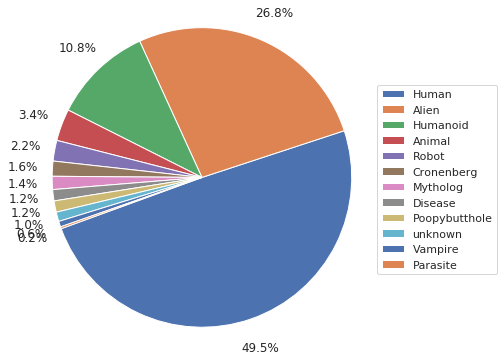

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


fig1 = plt.figure(figsize=[6, 6])
ax1 = fig1.add_subplot(111)

ax1.pie(df_cleaned['species'].value_counts().tolist(), labels=None, autopct='%1.1f%%', pctdistance = 1.2, startangle=200)

ax1.axis('equal')  

ax1.legend(loc="center left", labels = df_cleaned['species'].value_counts().index, bbox_to_anchor=(1, 0, 0.5, 1))



plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

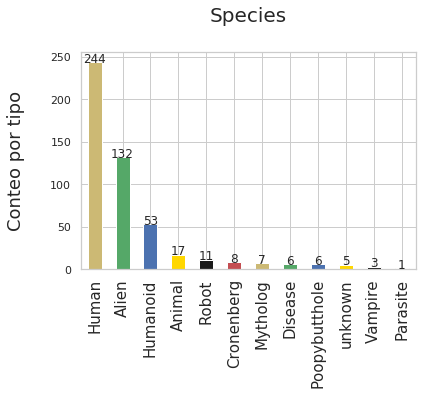

In [214]:

grafica = df_cleaned['species'].value_counts().plot(kind='bar',
                     color=['y','g','b','gold','k','r'])

for p in grafica.patches:
    grafica.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', )

plt.title('Species',fontsize=20, pad=30)
plt.ylabel('Conteo por tipo', fontsize=18, labelpad=25)
plt.xticks(fontsize=15)